<a href="https://colab.research.google.com/github/samarthya04/IIIT-A-internship/blob/main/DrugLib_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re

In [4]:
train_path = '/content/drive/MyDrive/IIIT-A-Internship/Drug Review/Drug Reviews (Druglib.com)/drugLibTest_raw.csv'
test_path= '/content/drive/MyDrive/IIIT-A-Internship/Drug Review/Drug Reviews (Druglib.com)/drugLibTest_raw.csv'

In [12]:
cols = ['reviewID', 'drugName', 'rating', 'effectiveness', 'sideEffects', 'condition', 'benefitsReview', 'sideEffectsReview', 'commentsReview']

train_data = pd.read_csv(train_path, names=cols).drop(0)
test_data = pd.read_csv(test_path, names=cols).drop(0)

df = pd.concat([train_data, test_data],ignore_index=True,axis=0)

display(df)

,reviewID,drugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,1366.0,biaxin,9,Considerably Effective,Mild Side Effects,sinus infection,The antibiotic may have destroyed bacteria cau...,"Some back pain, some nauseau.",Took the antibiotics for 14 days. Sinus infect...
1,3724.0,lamictal,9,Highly Effective,Mild Side Effects,bipolar disorder,Lamictal stabilized my serious mood swings. On...,"Drowsiness, a bit of mental numbness. If you t...",Severe mood swings between hypomania and depre...
2,3824.0,depakene,4,Moderately Effective,Severe Side Effects,bipolar disorder,Initial benefits were comparable to the brand ...,"Depakene has a very thin coating, which caused...",Depakote was prescribed to me by a Kaiser psyc...
3,969.0,sarafem,10,Highly Effective,No Side Effects,bi-polar / anxiety,It controlls my mood swings. It helps me think...,I didnt really notice any side effects.,This drug may not be for everyone but its wond...
4,696.0,accutane,10,Highly Effective,Mild Side Effects,nodular acne,Within one week of treatment superficial acne ...,Side effects included moderate to severe dry s...,Drug was taken in gelatin tablet at 0.5 mg per...
...,...,...,...,...,...,...,...,...,...
2067,690.0,accutane,7,Considerably Effective,Severe Side Effects,acne vulgaris,Detoxing effect by pushing out the system thro...,"Hairloss, extreme dry skin, itchiness, raises ...",Treatment period is 3 months/12 weeks. Dosage ...
2068,1071.0,proair-hfa,10,Highly Effective,No Side Effects,asthma,"The albuterol relieved the constriction, irrit...",I have experienced no side effects.,I use the albuterol as needed because of aller...
2069,681.0,accutane,8,Considerably Effective,Moderate Side Effects,serve acne,Serve Acne has turned to middle,"Painfull muscles, problems with seeing at night","This drug is highly teratogenic ,females must ..."
2070,2709.0,divigel,10,Highly Effective,No Side Effects,menopause,"My overall mood, sense of well being, energy l...",No side effects of any kind were noted or appa...,Divigel is a topically applied Bio-Identical H...


In [13]:
df['condition'].unique()

array(['sinus infection', 'bipolar disorder', 'bi-polar / anxiety',
       'nodular acne', 'seizure',
       'cervical disk degeneration and lower back pain', 'panic disorder',
       'depression', 'fibromyalgia', 'cold sores', 'chronic fatigue',
       'migraine', 'anxiety', 'stop smoking', 'heartburn',
       'rheumatoid arthritis', 'diverticulitis', 'seasonal allergies',
       'psoraitic arthritis', 'bone loss', 'rapid heart rate',
       'surgical memopause',
       'blood thinning/ circulation during pregnancy',
       'severe depression', 'slow thyroid  & irregular period',
       'depression/anxiety', 'wrinkles',
       'severe sore throat with pus, and ear pain on same',
       'hypercholestremia', 'back spasm', 'bipolar', 'pre-menepause',
       'bronchitis infectiion', 'reflux',
       'lack of attention for studying/school', 'obesity',
       'depression & anxiety',
       'severe depression< agrophobia & other phobias', 'eczema',
       'nausea (after surgery)', 'sleep dis

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072 entries, 0 to 2071
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   reviewID           2072 non-null   float64
 1   drugName           2072 non-null   object 
 2   rating             2072 non-null   object 
 3   effectiveness      2072 non-null   object 
 4   sideEffects        2072 non-null   object 
 5   condition          2072 non-null   object 
 6   benefitsReview     2062 non-null   object 
 7   sideEffectsReview  2026 non-null   object 
 8   commentsReview     2070 non-null   object 
dtypes: float64(1), object(8)
memory usage: 145.8+ KB


In [15]:
df.dropna(inplace=True)

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df['rating'] = df['rating'].astype(int)

In [18]:
categorical_columns = ['drugName', 'effectiveness', 'sideEffects', 'condition']
for col in categorical_columns:
    df[col] = df[col].astype('category')

In [19]:
df.dtypes

reviewID              float64
drugName             category
rating                  int64
effectiveness        category
sideEffects          category
condition            category
benefitsReview         object
sideEffectsReview      object
commentsReview         object
dtype: object

In [20]:
# Function to clean text
def clean_text(text):
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    return text

In [21]:
# Apply text cleaning function to review columns
df['benefitsReview'] = df['benefitsReview'].apply(clean_text)
df['sideEffectsReview'] = df['sideEffectsReview'].apply(clean_text)
df['commentsReview'] = df['commentsReview'].apply(clean_text)

# Verify text cleaning
df[['benefitsReview', 'sideEffectsReview', 'commentsReview']].head(10)

,benefitsReview,sideEffectsReview,commentsReview
0,the antibiotic may have destroyed bacteria cau...,some back pain some nauseau,took the antibiotics for 14 days sinus infecti...
1,lamictal stabilized my serious mood swings one...,drowsiness a bit of mental numbness if you tak...,severe mood swings between hypomania and depre...
2,initial benefits were comparable to the brand ...,depakene has a very thin coating which caused ...,depakote was prescribed to me by a kaiser psyc...
3,it controlls my mood swings it helps me think ...,i didnt really notice any side effects,this drug may not be for everyone but its wond...
4,within one week of treatment superficial acne ...,side effects included moderate to severe dry s...,drug was taken in gelatin tablet at 0 5 mg per...
5,by the end of the 10 day treatment i felt bett...,i felt no significant side effects perhaps som...,basically the treatment did not seem to work m...
6,reduction in seizures reduction in seizures re...,tired sleepy very tired sleep and tired very t...,took it for seizure took pills drank with wate...
7,ive been taking tramadol for 2 weeks now ive b...,i have had no side effects so far i hope it st...,treating for neck shoulder arms lower back hip...
8,i immediately stopped having panic attacks it ...,i experienced no side effects i was not tired ...,i started both klonopin and prozac together at...
9,the presumed benefits were to help with a seve...,here we go the initial effect would be dry mou...,family doctor initially prescribed wellbutin b...


In [22]:
print(df.isnull().sum())

reviewID             0
drugName             0
rating               0
effectiveness        0
sideEffects          0
condition            0
benefitsReview       0
sideEffectsReview    0
commentsReview       0
dtype: int64


In [23]:
df['benefitsReview'] = df['benefitsReview'].str.lower()
df['sideEffectsReview'] = df['sideEffectsReview'].str.lower()
df['commentsReview'] = df['commentsReview'].str.lower()

In [24]:
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df['benefitsReview_tokens'] = df['benefitsReview'].apply(word_tokenize)
df['sideEffectsReview_tokens'] = df['sideEffectsReview'].apply(word_tokenize)
df['commentsReview_tokens'] = df['commentsReview'].apply(word_tokenize)

df['benefitsReview_filtered'] = df['benefitsReview_tokens'].apply(lambda tokens: [word for word in tokens if word.lower() not in stop_words])
df['sideEffectsReview_filtered'] = df['sideEffectsReview_tokens'].apply(lambda tokens: [word for word in tokens if word.lower() not in stop_words])
df['commentsReview_filtered'] = df['commentsReview_tokens'].apply(lambda tokens: [word for word in tokens if word.lower() not in stop_words])

# Drop original review columns
df.drop(['benefitsReview', 'sideEffectsReview', 'commentsReview'], inplace=True, axis=1)
df.drop(['benefitsReview_tokens', 'sideEffectsReview_tokens', 'commentsReview_tokens'], inplace=True, axis=1)

df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,reviewID,drugName,rating,effectiveness,sideEffects,condition,benefitsReview_filtered,sideEffectsReview_filtered,commentsReview_filtered
0,1366.0,biaxin,9,Considerably Effective,Mild Side Effects,sinus infection,"[antibiotic, may, destroyed, bacteria, causing...","[back, pain, nauseau]","[took, antibiotics, 14, days, sinus, infection..."
1,3724.0,lamictal,9,Highly Effective,Mild Side Effects,bipolar disorder,"[lamictal, stabilized, serious, mood, swings, ...","[drowsiness, bit, mental, numbness, take, much...","[severe, mood, swings, hypomania, depression, ..."
2,3824.0,depakene,4,Moderately Effective,Severe Side Effects,bipolar disorder,"[initial, benefits, comparable, brand, name, v...","[depakene, thin, coating, caused, severe, hear...","[depakote, prescribed, kaiser, psychiatrist, p..."
3,969.0,sarafem,10,Highly Effective,No Side Effects,bi-polar / anxiety,"[controlls, mood, swings, helps, think, act, s...","[didnt, really, notice, side, effects]","[drug, may, everyone, wonderful, makes, totall..."
4,696.0,accutane,10,Highly Effective,Mild Side Effects,nodular acne,"[within, one, week, treatment, superficial, ac...","[side, effects, included, moderate, severe, dr...","[drug, taken, gelatin, tablet, 0, 5, mg, per, ..."


In [25]:
# Function to filter tokens based on length
def filter_tokens_by_length(tokens, min_length=2, max_length=15):
    return [token for token in tokens if min_length <= len(token) <= max_length]

# Apply token length control
df['benefitsReview_final'] = df['benefitsReview_filtered'].apply(filter_tokens_by_length)
df['sideEffectsReview_final'] = df['sideEffectsReview_filtered'].apply(filter_tokens_by_length)
df['commentsReview_final'] = df['commentsReview_filtered'].apply(filter_tokens_by_length)

df.drop(['benefitsReview_filtered', 'sideEffectsReview_filtered', 'commentsReview_filtered'], inplace=True, axis=1)

df.head()

,reviewID,drugName,rating,effectiveness,sideEffects,condition,benefitsReview_final,sideEffectsReview_final,commentsReview_final
0,1366.0,biaxin,9,Considerably Effective,Mild Side Effects,sinus infection,"[antibiotic, may, destroyed, bacteria, causing...","[back, pain, nauseau]","[took, antibiotics, 14, days, sinus, infection..."
1,3724.0,lamictal,9,Highly Effective,Mild Side Effects,bipolar disorder,"[lamictal, stabilized, serious, mood, swings, ...","[drowsiness, bit, mental, numbness, take, much...","[severe, mood, swings, hypomania, depression, ..."
2,3824.0,depakene,4,Moderately Effective,Severe Side Effects,bipolar disorder,"[initial, benefits, comparable, brand, name, v...","[depakene, thin, coating, caused, severe, hear...","[depakote, prescribed, kaiser, psychiatrist, p..."
3,969.0,sarafem,10,Highly Effective,No Side Effects,bi-polar / anxiety,"[controlls, mood, swings, helps, think, act, s...","[didnt, really, notice, side, effects]","[drug, may, everyone, wonderful, makes, totall..."
4,696.0,accutane,10,Highly Effective,Mild Side Effects,nodular acne,"[within, one, week, treatment, superficial, ac...","[side, effects, included, moderate, severe, dr...","[drug, taken, gelatin, tablet, mg, per, day, d..."


In [26]:
# Initialize Snowball stemmer
stemmer = SnowballStemmer('english')

# Function to apply stemming to a list of tokens
def apply_stemming(tokens):
    return [stemmer.stem(token) for token in tokens]

# Apply stemming to filtered token lists
df['benefitsReview_stemmed'] = df['benefitsReview_final'].apply(apply_stemming)
df['sideEffectsReview_stemmed'] = df['sideEffectsReview_final'].apply(apply_stemming)
df['commentsReview_stemmed'] = df['commentsReview_final'].apply(apply_stemming)

df.drop(['benefitsReview_final', 'sideEffectsReview_final', 'commentsReview_final'], inplace=True, axis=1)


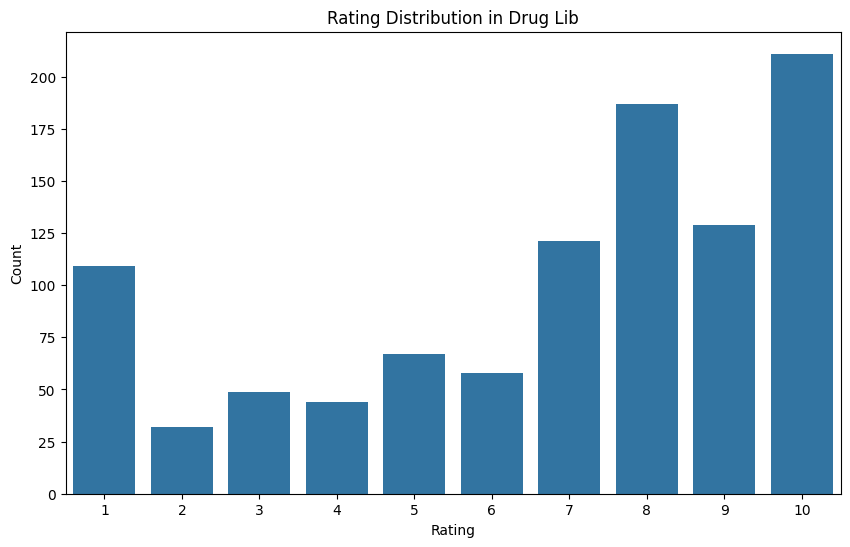

In [27]:
# Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='rating')
plt.title('Rating Distribution in Drug Lib')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

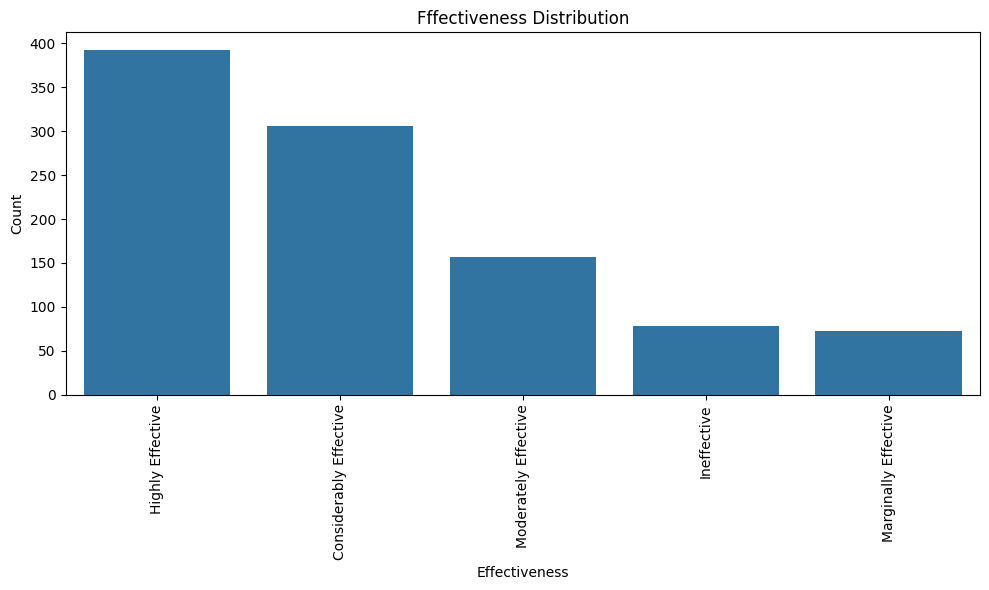

In [28]:
# Effectiveness Analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='effectiveness', order=df['effectiveness'].value_counts().index)
plt.title('Fffectiveness Distribution')
plt.xlabel('Effectiveness')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

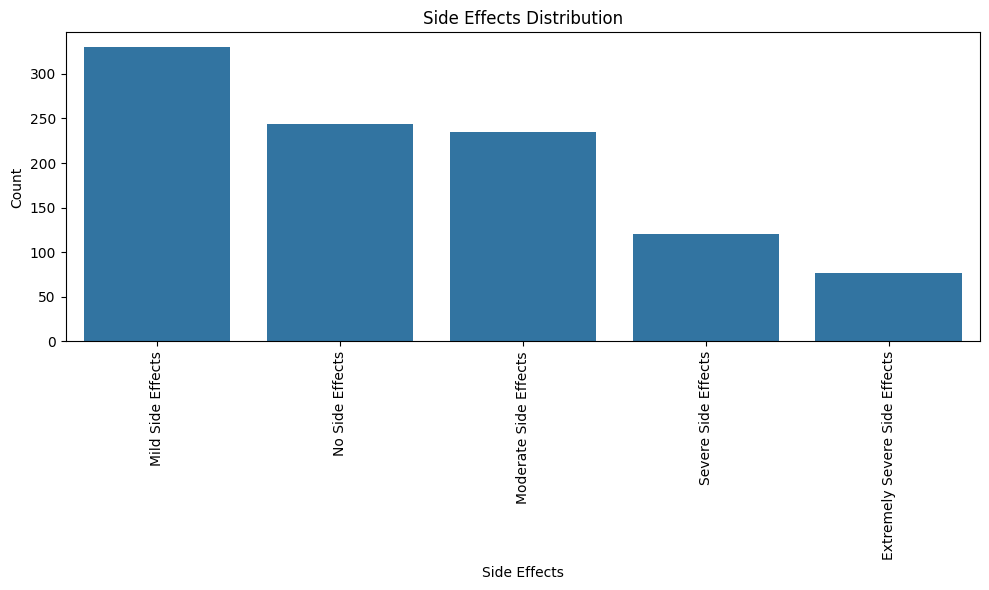

In [29]:
# Side Effects Analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sideEffects', order=df['sideEffects'].value_counts().index)
plt.title('Side Effects Distribution')
plt.xlabel('Side Effects')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [30]:
# Combine the reviews into a single column
df['allReviews'] = df['benefitsReview_stemmed'] + df['sideEffectsReview_stemmed'] + df['commentsReview_stemmed']
df['allReviews'] = df['allReviews'].apply(lambda x: ' '.join(x))

In [31]:
# Drop the stemmed reviews as they are now combined
df.drop(['benefitsReview_stemmed', 'sideEffectsReview_stemmed', 'commentsReview_stemmed'], inplace=True, axis=1)

In [32]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['allReviews'], df['rating'], test_size=0.2, random_state=42)

In [33]:
# Define the models to be tested with hyperparameter tuning
param_grid = {
    'SVM (linear)': {
        'clf__C': [0.1, 1, 10]
    },
    'SVM (poly)': {
        'clf__C': [0.1, 1, 10],
        'clf__degree': [2, 3, 4]
    },
    'SVM (rbf)': {
        'clf__C': [0.1, 1, 10],
        'clf__gamma': ['scale', 'auto']
    },
    'SVM (sigmoid)': {
        'clf__C': [0.1, 1, 10],
        'clf__gamma': ['scale', 'auto']
    },
    'Decision Tree': {
        'clf__max_depth': [3, 5, 7],
        'clf__criterion': ['gini', 'entropy']
    },
    'AdaBoost': {
        'clf__n_estimators': [50, 100, 150],
        'clf__learning_rate': [0.01, 0.1, 1]
    },
    'Naive Bayes': {}
}


In [34]:
# Define the models to be tested
models = {
    'SVM (linear)': SVC(kernel='linear'),
    'SVM (poly)': SVC(kernel='poly'),
    'SVM (rbf)': SVC(kernel='rbf'),
    'SVM (sigmoid)': SVC(kernel='sigmoid'),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, criterion='gini'),
    'AdaBoost': AdaBoostClassifier(),
    'Naive Bayes': GaussianNB()
}

In [35]:
# Custom transformer to convert sparse matrix to dense
class DenseTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.toarray()

In [36]:
# Prepare a function to create pipelines and run cross-validation
def evaluate_models(models, param_grid, X_train, y_train, X_test, y_test):
    results = []
    for model_name, model in models.items():
        if model_name == 'Naive Bayes':
            # Naive Bayes requires dense input
            pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('to_dense', DenseTransformer()),
                ('clf', model)
            ])
        else:
            pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('clf', model)
            ])

        grid = GridSearchCV(pipeline, param_grid[model_name], cv=5, scoring='accuracy', n_jobs=-1)
        grid.fit(X_train, y_train)
        y_pred = grid.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        results.append({
            'Model': model_name,
            'Best Params': grid.best_params_,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        })

    return results

In [37]:
# Evaluate models
results = evaluate_models(models, param_grid, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

In [38]:
# Print results
for result in results:
    print(f"Model: {result['Model']}")
    print(f"Best Params: {result['Best Params']}")
    print(f"Accuracy: {result['Accuracy']:.2f}")
    print(f"Precision: {result['Precision']:.2f}")
    print(f"Recall: {result['Recall']:.2f}")
    print(f"F1 Score: {result['F1 Score']:.2f}")
    print("\n")

Model: SVM (linear)
Best Params: {'clf__C': 10}
Accuracy: 0.28
Precision: 0.27
Recall: 0.28
F1 Score: 0.26


Model: SVM (poly)
Best Params: {'clf__C': 10, 'clf__degree': 2}
Accuracy: 0.29
Precision: 0.24
Recall: 0.29
F1 Score: 0.19


Model: SVM (rbf)
Best Params: {'clf__C': 10, 'clf__gamma': 'scale'}
Accuracy: 0.29
Precision: 0.30
Recall: 0.29
F1 Score: 0.24


Model: SVM (sigmoid)
Best Params: {'clf__C': 1, 'clf__gamma': 'scale'}
Accuracy: 0.32
Precision: 0.23
Recall: 0.32
F1 Score: 0.24


Model: Decision Tree
Best Params: {'clf__criterion': 'entropy', 'clf__max_depth': 3}
Accuracy: 0.20
Precision: 0.14
Recall: 0.20
F1 Score: 0.11


Model: AdaBoost
Best Params: {'clf__learning_rate': 0.1, 'clf__n_estimators': 50}
Accuracy: 0.24
Precision: 0.12
Recall: 0.24
F1 Score: 0.14


Model: Naive Bayes
Best Params: {}
Accuracy: 0.24
Precision: 0.23
Recall: 0.24
F1 Score: 0.23


